In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import io
import numpy
from pandas import DataFrame

def retrieve_files(input_path):
    for root, dirnames, filenames in os.walk(input_path):
        for filename in filenames:
            path = os.path.join(root, filename)
            inBody = False
            text = []
            content = io.open(path, 'r', encoding = 'latin1')

            for line in content:
                if inBody:
                    text.append(line)
                elif line == '\n':
                    inBody = True
            content.close()

            text = '\n'.join(text)
            yield path, text
        
def retrieve_data(input_path, category):
    rows = []
    index = []
    for path, text in retrieve_files(input_path):
        rows.append({'message': text, 'class': category})
        index.append(path)
        
    return DataFrame(rows, index = index)

data = DataFrame({'message': [], 'class': []})

In [2]:
data = data.append(retrieve_data('emails/spam', 'spam'))
data = data.append(retrieve_data('emails/ham', 'ham'))

In [3]:
data.head()

,class,message
emails/spam\00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
emails/spam\00004.eac8de8d759b7e74154f142194282724,spam,##############################################...
emails/spam\00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...


In [4]:
data.groupby('class').describe()

message
class                                                          
ham   count                                                2500
      unique                                               2472
      top     URL: http://www.askbjoernhansen.com/archives/2...
      freq                                                    4
spam  count                                                 500
      unique                                                471
      top     ------000000000000000000000\n\nContent-Type: t...
      freq                                                    4

In [5]:
data['length'] = data['message'].map(lambda x: len(x))

In [6]:
data.head()

,class,message,length
emails/spam\00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",3966
emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,820
emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,669
emails/spam\00004.eac8de8d759b7e74154f142194282724,spam,##############################################...,3004
emails/spam\00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...,687


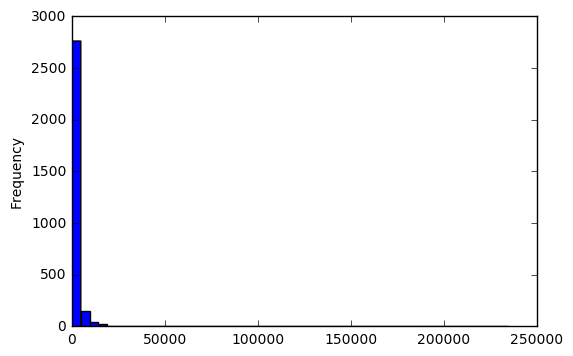

In [7]:
data.length.plot(kind = 'hist', bins = 50)

In [8]:
data.length.describe()

count      3000.000000
mean       2196.253333
std        7378.845770
min          54.000000
25%         526.000000
50%        1025.000000
75%        1857.000000
max      234358.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B0AC1D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2E3C88>], dtype=object)

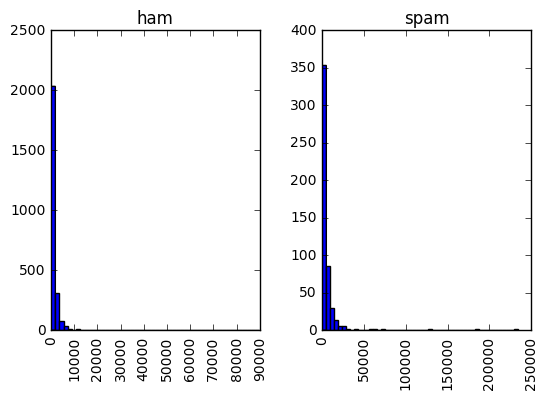

In [9]:
data.hist(column = 'length', by = 'class', bins = 50)

In [10]:
from sklearn.cross_validation import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data['message'].values, data['class'].values, 
                                                                   test_size = 0.3)

# Naive Bayes

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(train_data)

In [12]:
classifier1 = MultinomialNB()
classifier1.fit(counts, train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier1.predict(example_counts)
predictions

array(['spam', 'ham'], 
      dtype='|S4')

In [14]:
allpredictions1 = classifier1.predict(vectorizer.transform(test_data))

In [15]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [16]:
print 'accuracy:', accuracy_score(test_target, allpredictions1)

accuracy: 0.946666666667


In [17]:
print 'confusion matrix:\n', confusion_matrix(test_target, allpredictions1)

confusion matrix:
[[741   1]
 [ 47 111]]


In [18]:
import seaborn as sns

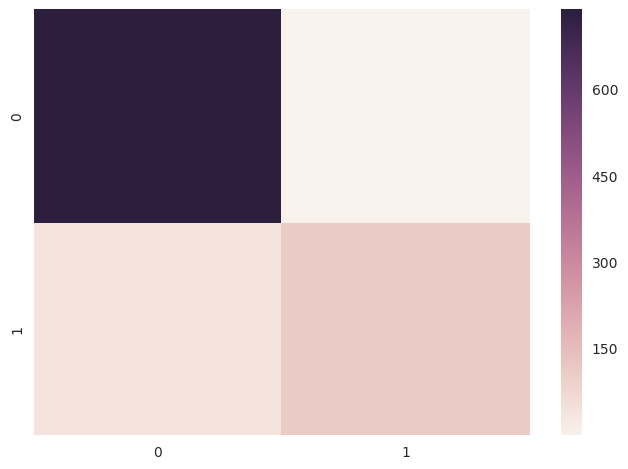

In [19]:
sns.heatmap(confusion_matrix(test_target, allpredictions1))

In [20]:
print classification_report(test_target, allpredictions1)

             precision    recall  f1-score   support

        ham       0.94      1.00      0.97       742
       spam       0.99      0.70      0.82       158

avg / total       0.95      0.95      0.94       900



# GridSearchCV

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cross_validation import StratifiedKFold

pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier()),
    ])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    #'clf__n_iter': (10, 50, 80),
}

classifier2 = GridSearchCV(pipeline, parameters, n_jobs = -1, verbose = 1, cv = StratifiedKFold(train_target, n_folds=5))
classifier2.fit(train_data, train_target)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=['ham' 'spam' ..., 'spam' 'ham'], n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        st...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': ((1, 1), (1, 2)), 'clf__penalty': ('l2', 'elasticnet'), 'clf__alpha': (1e-05, 1e-06), 'vect__max_df': (0.5, 0.75, 1.0)},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [22]:
print("Best score: %0.3f" % classifier2.best_score_)
print("Best parameters set:")
best_parameters = classifier2.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.993
Best parameters set:
	clf__alpha: 1e-05
	clf__penalty: 'elasticnet'
	vect__max_df: 1.0
	vect__ngram_range: (1, 2)


In [23]:
allpredictions2 = classifier2.predict(test_data)

In [24]:
print 'accuracy:', accuracy_score(test_target, allpredictions2)

accuracy: 0.986666666667


In [25]:
print 'confusion matrix:\n', confusion_matrix(test_target, allpredictions2)

confusion matrix:
[[742   0]
 [ 12 146]]


In [26]:
print classification_report(test_target, allpredictions2)

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99       742
       spam       1.00      0.92      0.96       158

avg / total       0.99      0.99      0.99       900



# Linear SVC

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(train_data)

In [28]:
classifier3 = LinearSVC()
classifier3.fit(counts, train_target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [29]:
allpredictions3 = classifier3.predict(vectorizer.transform(test_data))

In [30]:
print 'accuracy:', accuracy_score(test_target, allpredictions3)

accuracy: 0.982222222222


In [31]:
print 'confusion matrix:\n', confusion_matrix(test_target, allpredictions3)

confusion matrix:
[[741   1]
 [ 15 143]]


In [32]:
print classification_report(test_target, allpredictions3)

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99       742
       spam       0.99      0.91      0.95       158

avg / total       0.98      0.98      0.98       900



In [33]:
import cPickle

with open('email_spam.pkl', 'wb') as fout:
    cPickle.dump(classifier2, fout)